## Create heatmaps of feature tables

**Author**: Madeleine Ernst (mernst@ucsd.edu) <br>
**Edited by**: - <br>
**Use case**: Create heatmaps of overall and annotated features across different samples. <br>
**Input file format**: <br>
<ul>
<li>**Feature table with metadata** (.csv) table with samples in rows and metadata as well as features in columns. </li>
<li>**GNPS library matches** (.tsv) table retrieved from GNPS within the DB_result output folder.</li>
</ul>
**Outputs**: Heatmaps with overall and only annotated features selected <br>
**Dependencies**: R version 3.3.3 (2017-03-06) and libraries RColorBrewer_1.1-2 and gplots_3.0.1  

In [1]:
mylib <- '~/Rlib'

if (!dir.exists(mylib)){
    dir.create(mylib)
}
library(gplots, lib.loc = mylib)
library(RColorBrewer, lib.loc = mylib)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



read feature table with metadata file

In [2]:
data <- read.csv("FeatureTable_G4_yogurt_Clean.csv", header=TRUE, stringsAsFactors=F,row.names=1)
data[1:5,1:5]

,additives,additives_specific,ATTRIBUTE_age,age_units,animal_product_substitute
G95952_BA6_01_31659.mzXML,no,not applicable,t=0,hrs,no
G95953_BB6_01_31682.mzXML,no,not applicable,t=0,hrs,no
G95954_RF12_01_31571.mzXML,no,not applicable,t=0,hrs,no
G95955_RE10_01_31522.mzXML,no,not applicable,t=0,hrs,no
G95956_repeat_RB5_01_31534.mzXML,no,not applicable,t=0,hrs,no


read GNPS library matches

In [3]:
db <- read.csv("8093544c2ddd4e5da01b6d58d410eef5.tsv",sep="\t",quote="")
head(db)

X.Scan.,Adduct,CAS_Number,Charge,Compound_Name,Compound_Source,Data_Collector,ExactMass,FileScanUniqueID,INCHI,⋯,RT_Query,SharedPeaks,Smiles,SpecCharge,SpecMZ,SpectrumFile,SpectrumID,TIC_Query,UpdateWorkflowName,tags
1010,M+H,N/A,1,PC(18:0/18:1); [M+H]+ C44H87N1O8P1,Commercial,Thomas Metz,0,spectra/specs_ms.mgf1010,N/A,⋯,0,8,N/A,1,787.669,spectra/specs_ms.mgf,CCMSLIB00003126913,31247,UPDATE-SINGLE-ANNOTATED-GOLD,
1011,M+H,N/A,1,PC(18:0/18:1); [M+H]+ C44H87N1O8P1,Commercial,Thomas Metz,0,spectra/specs_ms.mgf1011,N/A,⋯,0,7,N/A,1,787.668,spectra/specs_ms.mgf,CCMSLIB00003126913,23574,UPDATE-SINGLE-ANNOTATED-GOLD,
1032,M+H,N/A,1,PC(16:0/20:1); [M+H]+ C44H87N1O8P1,Commercial,Thomas Metz,0,spectra/specs_ms.mgf1032,N/A,⋯,0,5,N/A,1,787.669,spectra/specs_ms.mgf,CCMSLIB00003130667,19322,UPDATE-SINGLE-ANNOTATED-GOLD,
1052,M+H,N/A,1,PC(18:0/18:1); [M+H]+ C44H87N1O8P1,Commercial,Thomas Metz,0,spectra/specs_ms.mgf1052,N/A,⋯,0,7,N/A,1,787.669,spectra/specs_ms.mgf,CCMSLIB00003126913,14218,UPDATE-SINGLE-ANNOTATED-GOLD,
1091,M+H,N/A,1,PC(16:0/20:1); [M+H]+ C44H87N1O8P1,Commercial,Thomas Metz,0,spectra/specs_ms.mgf1091,N/A,⋯,0,5,N/A,1,787.669,spectra/specs_ms.mgf,CCMSLIB00003130667,9254,UPDATE-SINGLE-ANNOTATED-GOLD,
1117,M+H,34612389,1,Maltotetraose,Isolated,NIST,0,spectra/specs_ms.mgf1117,"InChI=1S/C24H42O21/c25-1-5-9(29)10(30)15(35)22(40-5)44-19-7(3-27)42-24(17(37)12(19)32)45-20-8(4-28)41-23(16(36)13(20)33)43-18-6(2-26)39-21(38)14(34)11(18)31/h5-38H,1-4H2/t5-,6-,7-,8-,9-,10+,11-,12-,13-,14-,15-,16-,17-,18-,19-,20-,21-,22-,23-,24-/m1/s1",⋯,0,4,C(C1C(C(C(C(O1)OC2C(OC(C(C2O)O)OC3C(OC(C(C3O)O)OC4C(OC(C(C4O)O)O)CO)CO)CO)O)O)O)O,1,667.229,spectra/specs_ms.mgf,CCMSLIB00003195489,3626,UPDATE-SINGLE-ANNOTATED-BRONZE,


how many metadata columns are there? (here 141)

In [4]:
nonfeatures <- c(1:141)

In [5]:
# Normalize the features by TIC and adding 1 to all feature intensities 
tab2 <- data
tab2[,-nonfeatures] <- t(apply(tab2[,-nonfeatures], 1, function(x) (x+1)/sum((x+1))))
colnames(tab2)[-nonfeatures] <- gsub("X","",colnames(tab2)[-nonfeatures])

tab2 <- tab2[-(which(tab2$ATTRIBUTE_distributor_brand=="Kroger")[!which(tab2$ATTRIBUTE_distributor_brand=="Kroger") %in% intersect(which(tab2$ATTRIBUTE_distributor_brand=="Kroger"),which(tab2$ATTRIBUTE_age==" t=0"))]),]
tab2 <- tab2[-(which(tab2$ATTRIBUTE_distributor_brand=="Oikos")[!which(tab2$ATTRIBUTE_distributor_brand=="Oikos") %in% intersect(which(tab2$ATTRIBUTE_distributor_brand=="Oikos"),which(tab2$ATTRIBUTE_age==" t=0"))]),]
tab2 <- tab2[-(which(tab2$ATTRIBUTE_distributor_brand=="Sun Valley Dairy")[!which(tab2$ATTRIBUTE_distributor_brand=="Sun Valley Dairy") %in% intersect(which(tab2$ATTRIBUTE_distributor_brand=="Sun Valley Dairy"),which(tab2$ATTRIBUTE_age==" t=0"))]),]

tab2$ATTRIBUTE_distributor_brand[tab2$ATTRIBUTE_distributor_brand=="Kroger"] <- "homemade (Horizon milk+Kroger yogurt)_yogurt"
tab2$ATTRIBUTE_distributor_brand[tab2$ATTRIBUTE_distributor_brand=="Oikos"] <- "homemade (Horizon milk + Oikos yogurt)_yogurt"
tab2$ATTRIBUTE_distributor_brand[tab2$ATTRIBUTE_distributor_brand=="Sun Valley Dairy"] <- "homemade (Horizon milk + Voskos yogurt)_yogurt"
tab2$ATTRIBUTE_distributor_brand[tab2$ATTRIBUTE_distributor_brand=="Horizon"] <- "1Horizon"
                               
tab2 <- tab2[with(tab2, order(ATTRIBUTE_distributor_brand,ATTRIBUTE_age,ATTRIBUTE_description)), ] #
ft <- tab2[,c((length(nonfeatures)+1):ncol(tab2))]
my_palette <- colorRampPalette(c("blue","white","red"))(n = 15)  

tab2$type_age <- paste(tab2$ATTRIBUTE_distributor_brand,tab2$ATTRIBUTE_age,tab2$ATTRIBUTE_description,sep="_") #tab2$description,
tab2$type_age <- paste(c(rep(1,each=18),rep(c(2,3,4),each=21)),tab2$type_age,sep="_")

colpal <- c(brewer.pal(6, "Blues"),
            brewer.pal(7, "Reds"),brewer.pal(7, "Oranges"),brewer.pal(7, "YlOrRd"))

Rowside_species <- tab2$type_age
Rowside_cols <- colpal[as.numeric(as.factor(Rowside_species))]

plot heatmap

Warning message in heatmap.2(t(ft), cexCol = 0.1, cexRow = 0.1, scale = "row", Colv = FALSE, :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

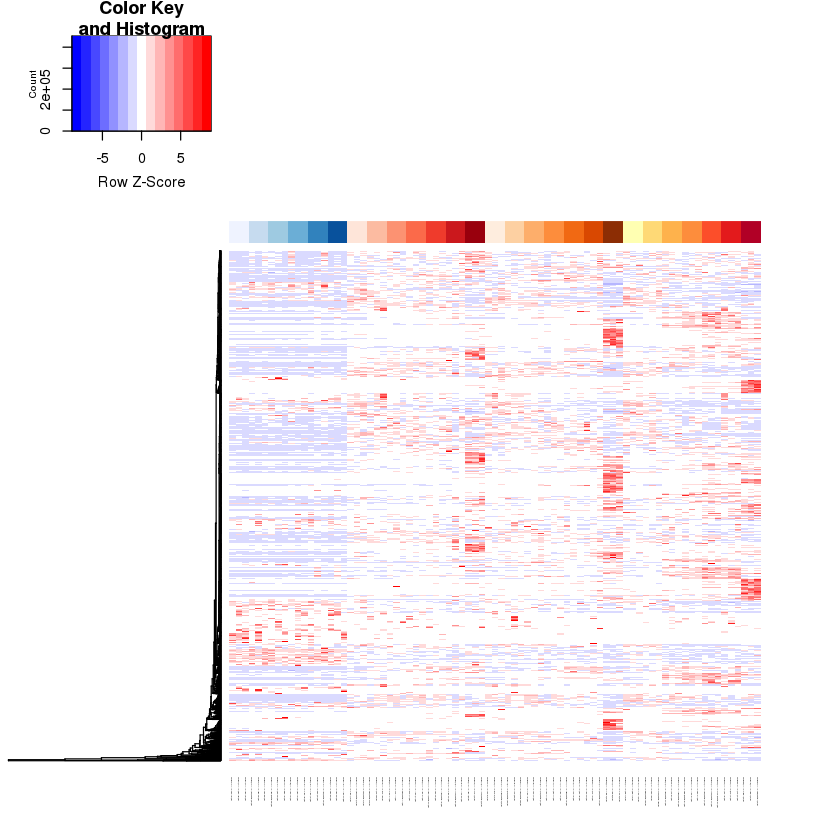

In [6]:
heatmap.2(t(ft), cexCol = 0.1,cexRow = 0.1,scale="row", Colv= FALSE, col = my_palette, tracecol=NA,ColSideColors=Rowside_cols,labRow = FALSE) #

save heatmap to pdf

In [9]:
pdf(file="Yogurt_HeatMap_RowScaled_withNames.pdf", width=11, height=130)
heatmap.2(t(ft), cexCol = 0.1,cexRow = 0.1,scale="row", Colv= FALSE, col = my_palette, tracecol=NA,ColSideColors=Rowside_cols) #labRow = FALSE
dev.off()

Warning message in heatmap.2(t(ft), cexCol = 0.1, cexRow = 0.1, scale = "row", Colv = FALSE, :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

png 
  2

### create heatmaps with only annotated features

In [34]:
f_ids <- unlist(lapply(strsplit(colnames(tab2)[(length(nonfeatures)+1):ncol(tab2)],split="_"), `[[`, 1))

tab2 <- tab2[,c(nonfeatures,which(f_ids %in% db$X.Scan.)+length(nonfeatures))]
colnames(tab2)[(length(nonfeatures)+1):ncol(tab2)] <- as.character(db$Compound_Name[which(db$X.Scan. %in% f_ids)])

ft <- tab2[,c((length(nonfeatures)+1):ncol(tab2))]

plot heatmap

Warning message in heatmap.2(t(ft), cexCol = 0.1, cexRow = 0.1, scale = "row", Colv = FALSE, :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

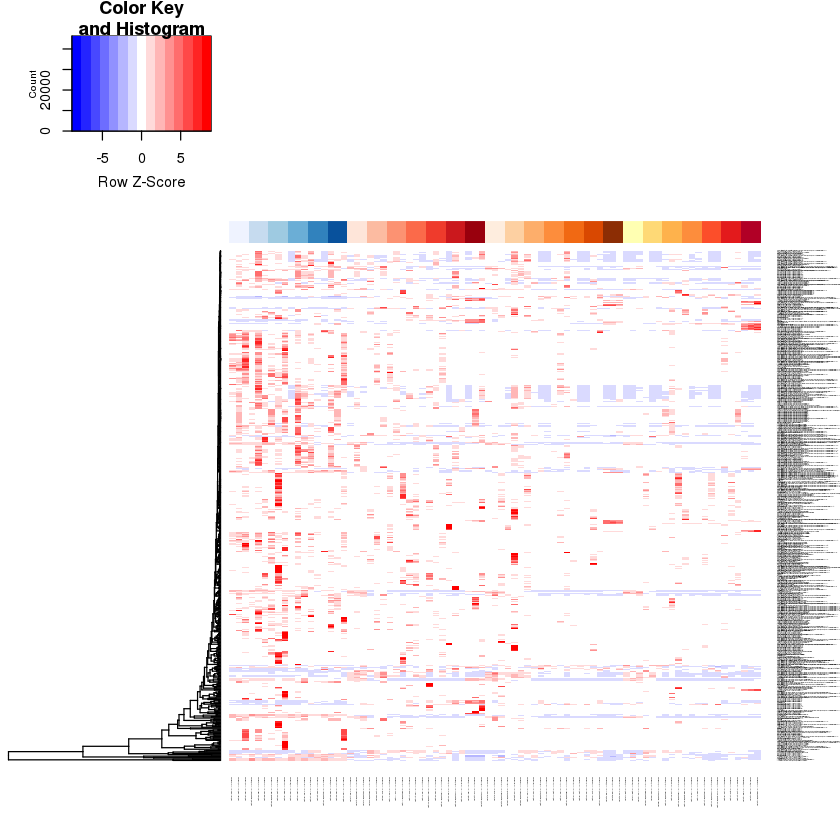

In [19]:
heatmap.2(t(ft), cexCol = 0.1,cexRow = 0.1,scale="row", Colv= FALSE, col = my_palette, tracecol=NA,ColSideColors=Rowside_cols)

save heatmap to pdf

In [20]:
pdf(file="Yogurt_HeatMap_RowScaled_Annotated_CompoundNames.pdf", width=11, height=9)
heatmap.2(t(ft), cexCol = 0.1,cexRow = 0.1,scale="row", Colv= FALSE, col = my_palette, tracecol=NA,ColSideColors=Rowside_cols) #
dev.off()

Warning message in heatmap.2(t(ft), cexCol = 0.1, cexRow = 0.1, scale = "row", Colv = FALSE, :
“Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram.”

png 
  2